In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from random import shuffle 
from tqdm import tqdm 
import cv2
from PIL import Image
import os
print(os.listdir("../code/Clean room vs Messy room"))

['test', 'train', 'val']


In [6]:
train_messy = "../code/Clean room vs Messy room/train/messy"
train_clean = "../code/Clean room vs Messy room/train/clean"
test_messy  = "../code/Clean room vs Messy room/val/messy"
test_clean  = "../code/Clean room vs Messy room/val/clean"
image_size=128

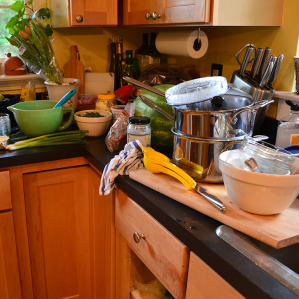

In [7]:
#plotting a messy room
Image.open("../Code/Clean room vs Messy room/train/messy/16.png")

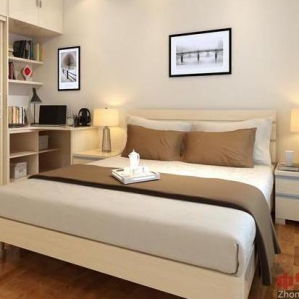

In [8]:
#plotting a clean room
Image.open("C:/Users/saksh/Desktop/Machine Learning Projects/Logistic Regression/Dataset/Clean room vs Messy room/train/clean/69.png")

100%|██████████| 96/96 [00:06<00:00, 14.44it/s]


Text(0.5, 1.0, 'Messy and Clean rooms in Grayscale')

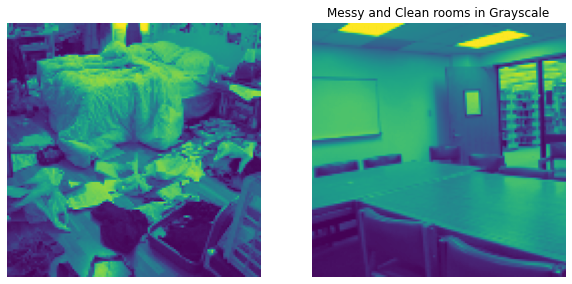

In [9]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)
    
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(np_img.reshape(image_size,image_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np_img2.reshape(image_size,image_size))
plt.axis('off')
plt.title("Messy and Clean rooms in Grayscale")

In [25]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return training_data

In [26]:
def test_data():
    test_data_messy = []
    test_data_clean = []
    for image1 in tqdm(os.listdir(test_messy)):
        path = os.path.join(test_messy,image1)
        img1 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1,(image_size,image_size))
        test_data_messy.append(img1)
    for image2 in tqdm(os.listdir(test_clean)):
        path = os.path.join(test_clean,image2)
        img2 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2,(image_size,image_size))
        test_data_clean.append(img2)
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0)
    return test_data

In [27]:
train_data = train_data()
test_data = test_data()
print(train_data.shape)
print(test_data.shape)
#now our data is in the form of numpy arrays

100%|██████████| 10/10 [00:00<00:00, 208.14it/s]

(192, 128, 128)
(20, 128, 128)


In [28]:
x_data = np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [29]:
#creating y_Train and y_test data
z1 = np.zeros(96)
o1 = np.ones(96)
y_train = np.concatenate((o1,z1),axis=0)
z = np.zeros(10)
o = np.ones(10)
y_test = np.concatenate((o,z),axis=0)

In [30]:
y_data = np.concatenate((y_train,y_test),axis=0).reshape(x_data.shape[0],1)
print("Shape of X :",x_data.shape)
print("Shape of y :",y_data.shape)
#with this we have now created our data in the form of numpy array
#with x_data storing the pixel values
#and y_Data storing the label values

Shape of X : (212, 128, 128)
Shape of y : (212, 1)


In [34]:
#splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.15,random_state=42)

In [36]:
training_egs = X_train.shape[0]
testing_egs = X_test.shape[0]
#now we reduce the dimension of X_train and X_test.Currently they are in 3
#dimensions.Now we convert them into 2d array where the number of rows will 
#be equal to the number of egs in the dataset adn the number columns will 
#be equal to 128*128=16324 i.e. each column will store a pixel value
#corresponding to each image
X_train_flatten = X_train.reshape(training_egs,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(testing_egs,X_test.shape[1]*X_test.shape[2])
print("X_train_flatten shape = ",X_train_flatten.shape)
print("X_test_flatten shape = ",X_test_flatten.shape)
print(y_train.shape)
print(y_test.shape)

X_train_flatten shape =  (180, 16384)
X_test_flatten shape =  (32, 16384)
(180, 1)
(32, 1)


In [50]:
#making the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
#we will use grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
param_grid = {'C':np.logspace(-3,3,7)}
lr_gridsearch = GridSearchCV(lr,param_grid)
lr_gridsearch.fit(X_train_flatten,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [52]:
#printing the best hyperparameters
print("best hyperparameters:",lr_gridsearch.best_params_)
#printing the accuracy corresponding the obtained hyperparameters
print("accuracy: ",lr_gridsearch.best_score_)

best hyperparameters: {'C': 0.1}
accuracy:  0.9722222222222221


In [58]:
#making a logistic regression model using the best hyperparameters
lr = LogisticRegression(C=0.1)
lr.fit(X_train_flatten,y_train)
#finding the testing and the training accuracy
test_accuracy = lr.fit(X_test_flatten,y_test).score(X_test_flatten,y_test)
print("testing accuracy = ",test_accuracy)
training_accuracy = lr.fit(X_train_flatten,y_train).score(X_train_flatten,y_train)
print("Training accuracy = ",training_accuracy)

testing accuracy =  1.0
Training accuracy =  1.0
